<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/OilProperties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Calculation of properties of reservoir fluids
#@markdown This section gives an introduction to the calculation of properties of reservoir fluids.
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## PVT of Oil and Gas in Reservoir Fluids

PVT properties play a crucial role in reservoir and production engineering. They provide insights into the behavior of oil and gas when subjected to changes in pressure and temperature, enabling effective reservoir management and production optimization.

### 1. **Definition**:
PVT analysis involves the study of how reservoir fluids (primarily oil and gas) behave under varying conditions of pressure, volume, and temperature.

### 2. **Why is it Important?**:
- Predicting reservoir performance.
- Designing production systems.
- Optimizing recovery processes.

### 3. **Components of Reservoir Fluid**:
- **Gas**: Light hydrocarbons that remain gaseous in the reservoir under initial conditions.
- **Oil**: Liquid hydrocarbons present in the reservoir.
- **Water**: Often exists in the reservoir, and its PVT properties can also be essential.

### 4. **Key PVT Properties**:

- **Formation Volume Factor (FVF)**: Ratio of a fluid's volume at reservoir conditions to its volume at standard conditions.
  - **Oil Formation Volume Factor (Bo)**: Useful in estimating oil reserves.
  - **Gas Formation Volume Factor (Bg)**: Important for gas reserve calculations.

- **Solution Gas-Oil Ratio (GOR)**: Amount of gas that can dissolve in oil at reservoir conditions, expressed in standard cubic feet per barrel (scf/bbl).

- **Bubblepoint Pressure**: The pressure at which gas starts to evolve from oil as the first bubble of gas.

- **Dewpoint Pressure**: For gas condensates, the pressure at which liquid starts to condense from gas as the first droplet.

- **Viscosity**: Resistance of fluid to flow. It's vital for reservoir simulation, production system design, and enhanced oil recovery.

- **Compressibility**: Measure of volume change with pressure. Critical for understanding reservoir compaction and surface equipment design.

### 5. **Types of Reservoir Fluids**:

- **Dry Gas**: Exists as gas in the reservoir and remains gaseous when brought to the surface.
  
- **Wet Gas or Retrograde Gas Condensate**: Initially exists as gas in the reservoir but can condense into a liquid as pressure drops below the dew point.

- **Black Oil**: Dark-colored oil that can dissolve considerable amounts of gas. When depressurized, gas is liberated.

- **Volatile Oil**: Light-colored oil with significant quantities of intermediate components. These can vaporize into the gas phase as pressure drops.

### 6. **Sampling and Experiments**:
- Proper sampling is critical for accurate PVT analysis.
- Laboratory experiments like constant composition expansion, differential liberation, and separator tests help determine PVT properties.

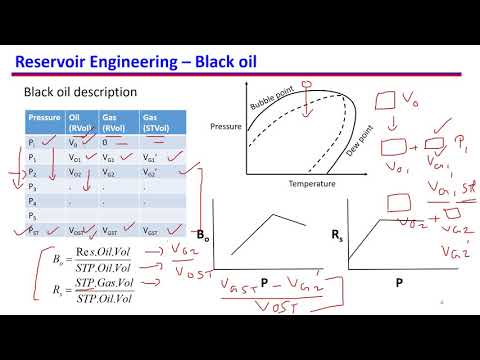

In [2]:
#@title  Formation volume factor and dissolved gas oil ratio
#@markdown Introduction to formation volume factor and dissolved gas oil ratio. Oil formation volume factor  is defined as the ratio of the volume of oil at reservoir (in-situ) conditions to that at stock tank (surface) conditions.  This factor, is used to convert the flow rate of oil (at stock tank conditions) to reservoir conditions.
from IPython.display import YouTubeVideo
YouTubeVideo('QHgjMlyePvU', width=600, height=400)

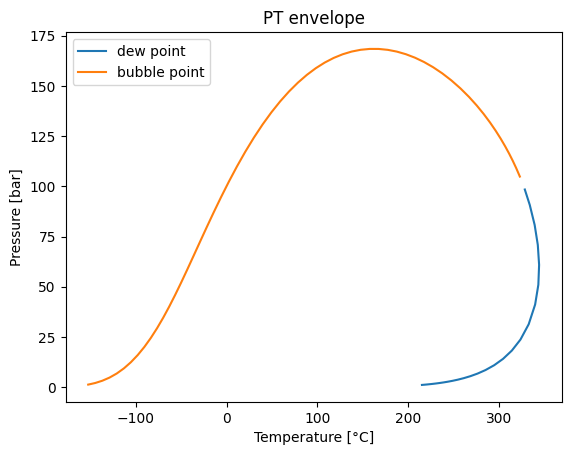

In [3]:
#@title Phase Envelope of a black oil

from neqsim.thermo import fluid, TPflash

nitrogen = 0.20 #@param {type:"number"}
CO2 = 1.3 #@param {type:"number"}
methane = 50.3  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  1.25 #@param {type:"number"}
npentane =  1.25 #@param {type:"number"}
C6 =  5.1 #@param {type:"number"}
C7 =  7.1 #@param {type:"number"}
C8 =  10.1 #@param {type:"number"}
C9 =  12.1 #@param {type:"number"}
C10plus =  15.1 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addTBPfraction("C6", C6, 0.08, 0.61)
fluid1.addTBPfraction("C7", C7, 0.1, 0.7)
fluid1.addTBPfraction("C8", C8, 0.11, 0.72)
fluid1.addTBPfraction("C9", C9, 0.15, 0.74)
fluid1.addPlusFraction("C10", C10plus, 0.25, 0.82)
fluid1.setMixingRule("classic")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope2()

plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

# Oil viscosity
THe principal factors affecting viscosity are:

* Oil composition
* Temperature
* Dissolved gas
* Pressure

Viscosity increases with decreases in crude oil API gravity (assuming a constant Watson characterization factor) and decreases in temperature. The effect of solution gas is to reduce viscosity. Above saturation pressure, viscosity increases almost linearly with pressure.

# Oil Formation Volume Factor (Bo)
In pressure transient analysis the flow rate used in the calculations is defined assuming reservoir conditions.  Since the oil flow rate is generally measured at the surface, in stock tank barrels, this rate must be converted to reservoir conditions by multiplying the surface rate by the oil formation volume factor.

Below the bubble point pressure, the oil formation volume factor increases with pressure.  This is because more gas goes into solution as the pressure is increased causing the oil to swell.  Above the bubble point pressure, the oil formation volume factor decreases as the pressure is increased, because there is no more gas available to go into solution and the oil is compressed.

The value of the oil formation volume factor is generally between 1 and 2 Rbbl / stbbl (R m3 / st m3).  It is readily obtained from laboratory PVT measurements or may be calculated from correlations such as Vasquez and Beggs.  It is recommended that the value be evaluated at reservoir conditions at the average reservoir pressure at the time of the test.



Note that when calculating the oil formation volume factor from correlations, the solution gas oil ratio (Rs) has a significant effect on the value.

Text(0, 0.5, 'Viscosity [cP]')

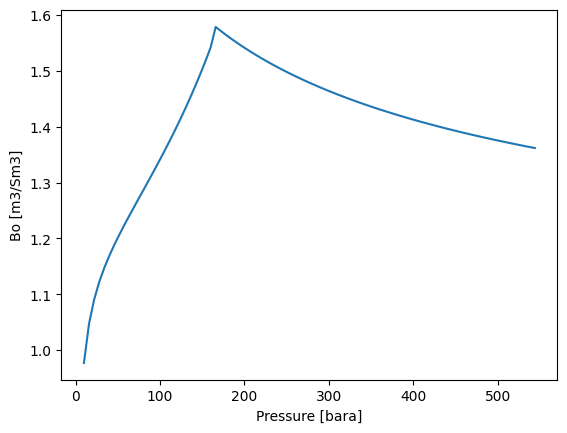

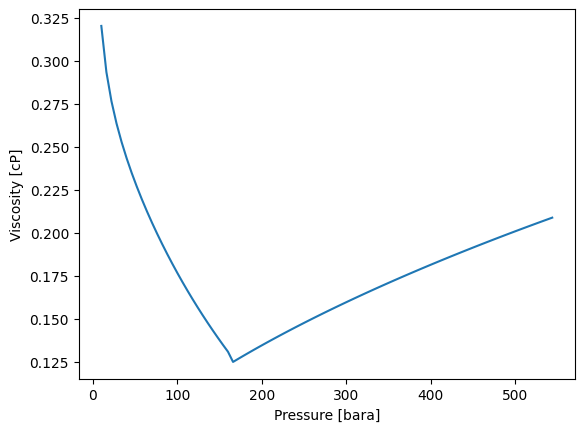

In [4]:
#@title  Calculation of formation volume factor and dissolved gas oil ratio
#@markdown Select temperature of reservoir, minimum and maximum pressure and composition of reservoir fluid.

temperature = 150.0   #@param {type:"number"}
minPressure = 10.0  #@param {type:"number"}
maxPressure = 550.0  #@param {type:"number"}

from neqsim.thermo import fluid, TPflash

def oilVolume(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    if(fluid1.hasPhaseType("oil")):
      return fluid1.getPhase("oil").getVolume()
    else:
      return fluid1.getVolume()

def oilViscosity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    if(fluid1.hasPhaseType("oil")):
      return fluid1.getPhase("oil").getViscosity("cP")
    else:
      return fluid1.getViscosity("cP")

stdVol = oilVolume(1.01325, 15.0)

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
realdensity = [oilVolume(P,temperature)/stdVol for P in pressure]
viscosity = [oilViscosity(P,temperature) for P in pressure]

plt.figure()
plt.plot(pressure, realdensity)
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')

plt.figure()
plt.plot(pressure, viscosity)
plt.xlabel('Pressure [bara]')
plt.ylabel('Viscosity [cP]')

# Solution Gas-Oil Ratio (Rs)
The solution gas-oil ratio is the amount of gas dissolved in the oil at any pressure. It increases approximately linearly with pressure and is a function of the oil and gas composition. A heavy oil contains less dissolved gas than a light oil. In general, the solution gas-oil ratio varies from 0 (dead oil) to approximately 2000 scf/bbl (very light oil). The solution gas-oil ratio increases with pressure until the bubble point pressure is reached, after which it is a constant, and the oil is said to be undersaturated.

The solution gas-oil ratio is a significant component of the PVT correlations. It has a very significant influence on the oil formation volume factor, the oil viscosity, and the oil compressibility.

density 633.2558719129103


Text(0, 0.5, 'Rs [Sm3 gas/Sm3 oil]')

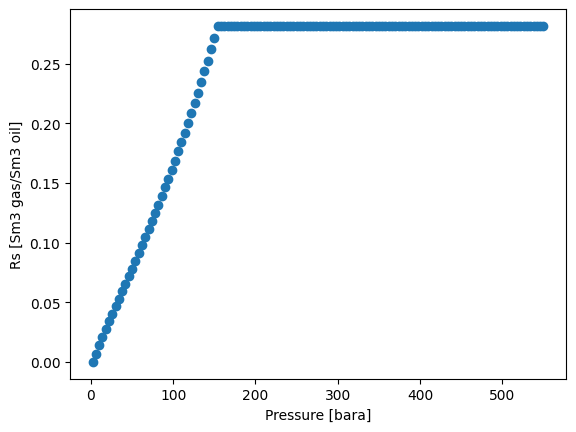

In [5]:
#@title  Calculation of formation volume factor and dissolved gas oil ratio
#@markdown Select temperature of reservoir, minimum and maximum pressure and composition of reservoir fluid.

temperature = 358.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 550.0  #@param {type:"number"}


stdVol = oilVolume(1.01325, 288.15)

def gasVolume(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    if(fluid1.getNumberOfPhases()>1):
      fluid1.removePhase(0)
    fluid1.setPressure(1.01325)
    fluid1.setTemperature(288.15)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    if(fluid1.hasPhaseType("gas")):
      return fluid1.getPhase("gas").getVolume()
    else:
      return 0.0


pressure = np.arange(maxPressure, minPressure, int((minPressure-maxPressure)/100)+1)
Rs = [gasVolume(P,temperature)/stdVol for P in pressure]

TPflash(fluid1)
print("density "+str(fluid1.getDensity()))

plt.figure()
plt.plot(pressure, Rs,"o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [Sm3 gas/Sm3 oil]')

# Separator tests
Separator Test experiments are carried out for both oil and gas condensate mixtures. A sample of reservoir liquid is placed in the laboratory cell and brought to reservoir temperature and bubble-point pressure. Then the liquid is expelled from the cell through a number of stages of separation.  Usually, two or three stages of separation are used, with the last stage at atmospheric pressure and near-ambient temperature (15°C).

The gas is let out of the separator through the top and is transferred to standard conditions, where its volume is measured. As for the differential liberation experiment, liquid dropping out from the gas is converted to an equivalent gas volume at standard conditions.

The liquid from the ﬁrst separator is let into a second separator at a lower pressure and temperature than the ﬁrst one. At which conditions, more gas will be liberated as sketched in the figure below. As with the gas from the ﬁrst separator, this gas is transferred to standard conditions.

The oil remaining after gas removal is brought to the conditions of the next separator stage. The gas is removed again and quantified by moles and specific gravity. Oil volume is noted, and the process is repeated until stock-tank conditions are reached. Final oil volume, Vo, and specific gravity, SGo, are measured at 15°C.

<Figure size 640x480 with 0 Axes>

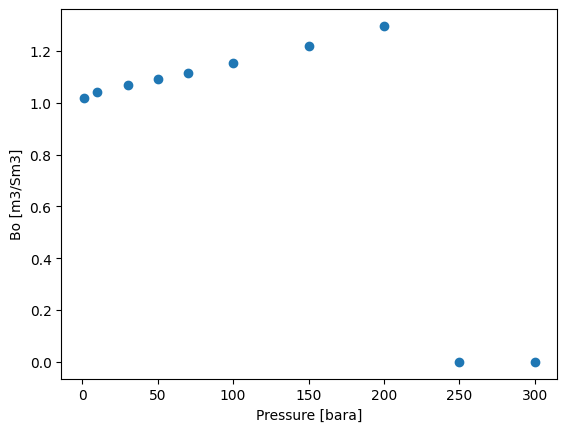

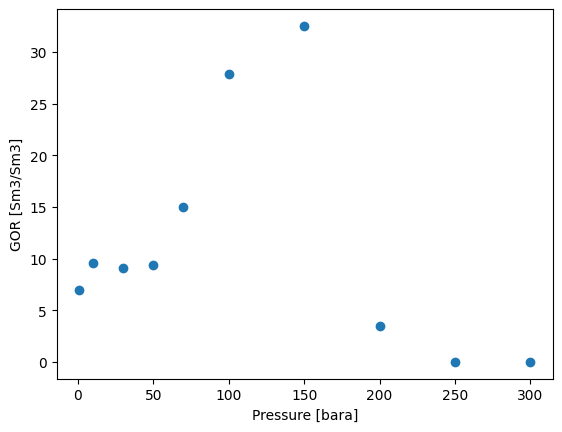

<Figure size 640x480 with 0 Axes>

In [6]:
fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", 0.01)
fluid1.addComponent("CO2", 0.01)
fluid1.addComponent("methane", 0.8)
fluid1.addComponent("ethane", 0.1)
fluid1.addComponent("propane", 0.02)
fluid1.addComponent("i-butane", 0.01)
fluid1.addComponent("n-butane", 0.01)
fluid1.addComponent("i-pentane", 0.001)
fluid1.addComponent("n-pentane", 0.001)
fluid1.addTBPfraction("C6", 0.02, 0.08, 0.61)
fluid1.addTBPfraction("C7", 0.02, 0.1, 0.7)
fluid1.addTBPfraction("C8", 0.01, 0.11, 0.72)
fluid1.addTBPfraction("C9", 0.01, 0.15, 0.74)
fluid1.addPlusFraction("C10", 0.5, 0.25, 0.82)
fluid1.setMixingRule("classic")

temperature = [55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0]
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]


Sm3gas =[]
m3oil = []
GOR = []
Bofactor = []

for (T, P) in zip(temperature, pressure):
    fluid1.setPressure(P)
    fluid1.setTemperature(T+273.15)
    TPflash(fluid1)
    #printFrame(fluid1)
    if(fluid1.getNumberOfPhases()>1):
       m3oil.append(fluid1.getPhase(1).getVolume())
    else:
       m3oil.append(fluid1.getVolume())
    if (fluid1.getNumberOfPhases() > 1 and fluid1.getPhase(0).getPhaseTypeName()=="gas"):
      fluid1.getPhase(0).setPressure(1.01325)
      fluid1.getPhase(0).setTemperature(288.15)
      fluid1.init(1)
      Sm3gas.append(fluid1.getPhase(0).getVolume())
      fluid1.removePhase(0)
    else:
      Sm3gas.append(0.0)

fluid1.setPressure(1.01325)
fluid1.setTemperature(288.15)
TPflash(fluid1)
fluid1.initProperties()
oilVolumeStdCond = fluid1.getPhase("oil").getVolume()

for (P, V, O) in zip(pressure, Sm3gas, m3oil):
            if (V > 1e-10):
                GOR.append(V / oilVolumeStdCond)
                Bofactor.append(O / oilVolumeStdCond)
            else:
                GOR.append(0.0)
                Bofactor.append(0.0)



plt.figure()
plt.plot(pressure, Bofactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.figure()
plt.plot(pressure, GOR, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('GOR [Sm3/Sm3]')
plt.figure()

